In [1]:
from sklearn import datasets

iris = datasets.load_iris()

target_index = {target_name:idx for idx,target_name in enumerate(iris['target_names'])}

print('keys:', iris.keys())
print('features:', iris['feature_names'])
print('targets:', target_index)

keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
targets: {'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [2]:
import numpy as np

# Step 1: Binary classifier

# Choose a features, petal width.
X = iris['data'][:, 3:]
y = (iris['target'] == target_index['virginica']).astype(np.int)

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

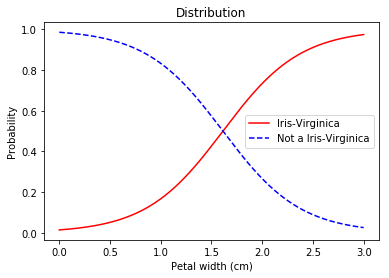

In [5]:
import matplotlib.pyplot as plt

X_test = np.linspace(0, 3, 1000).reshape((-1, 1))
y_proba = log_reg.predict_proba(X_test)

plt.figure('Distribution')
plt.title('Distribution')
plt.plot(X_test, y_proba[:, 1], 'r', label='Iris-Virginica')
plt.plot(X_test, y_proba[:, 0], 'b--', label='Not a Iris-Virginica')
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [10]:
# Step 2: Multi-class classifier

# Choose features, petal length and width.
X = iris['data'][:, 2:]
y = iris['target']

# Use a lbfgs library, BFGS, Broyden-Fletcher-Goldfarb-Shanno algorithm.
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
pred_prob = softmax_reg.predict_proba([[5, 2]])

for target, prob in zip(iris['target_names'], pred_prob.ravel()):
    print('%s:%f' % (target, prob))

setosa:0.000001
versicolor:0.057493
virginica:0.942506


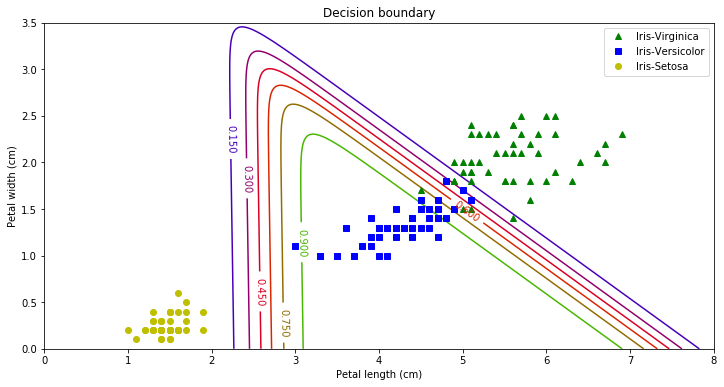

In [40]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape((-1, 1)),
                     np.linspace(0, 3.5, 200).reshape((-1, 1)))

X_test = np.c_[x0.ravel(), x1.ravel()]
y_proba = softmax_reg.predict_proba(X_test)

versicolor_proba = y_proba[:, target_index['versicolor']].reshape(x0.shape)

# Plot targets
virginica_indice = (y == target_index['virginica'])
versicolor_indice = (y == target_index['versicolor'])
setosa_indice = (y == target_index['setosa'])

plt.figure('Decision boundary', figsize=(12, 6))
plt.title('Decision boundary')
plt.plot(X[virginica_indice, 0], X[virginica_indice, 1], 'g^', label='Iris-Virginica')
plt.plot(X[versicolor_indice, 0], X[versicolor_indice, 1], 'bs', label='Iris-Versicolor')
plt.plot(X[setosa_indice, 0], X[setosa_indice, 1], 'yo', label='Iris-Setosa')
contour = plt.contour(x0, x1, versicolor_proba, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.show()